In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import islr
import util
import sigpy as sp
import sigpy.mri.rf as rf

# Set parameters

In [2]:
n = 256  # Pulse length
tb = 8  # Time bandwidth
d1 = 0.01  # Passband ripple
d2 = 0.01  # Stopband ripple
n_bands = 5
# phs_type = 'None'
phs_type = 'phs_mod'
band_sep = 3 * tb

# Design RF pulse using the original SLR

In [3]:
pulse = rf.dzrf(n=n, tb=tb, ptype='ex', ftype='pm', d1=d1 / n_bands, d2=d2 / n_bands)
b1_slr = rf.multiband.mb_rf(pulse, n_bands, band_sep, phs_type)

<IPython.core.display.Javascript object>


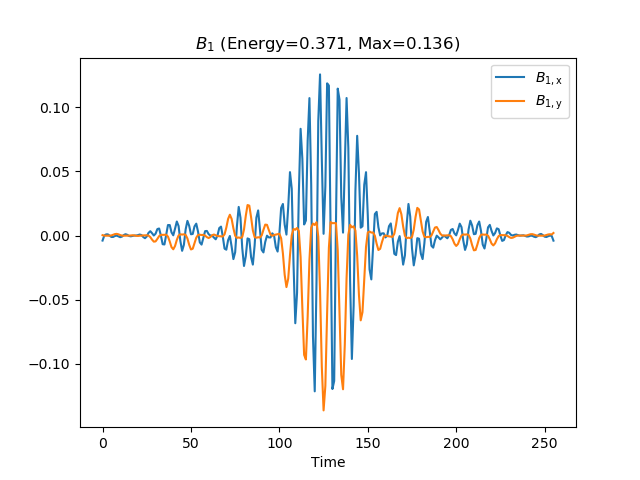

<IPython.core.display.Javascript object>


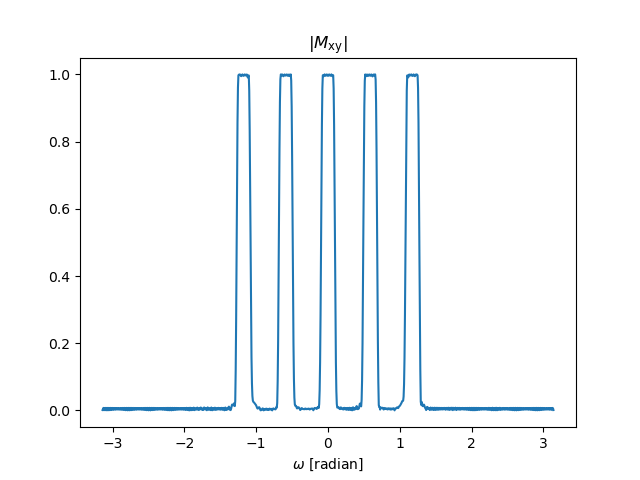

<IPython.core.display.Javascript object>


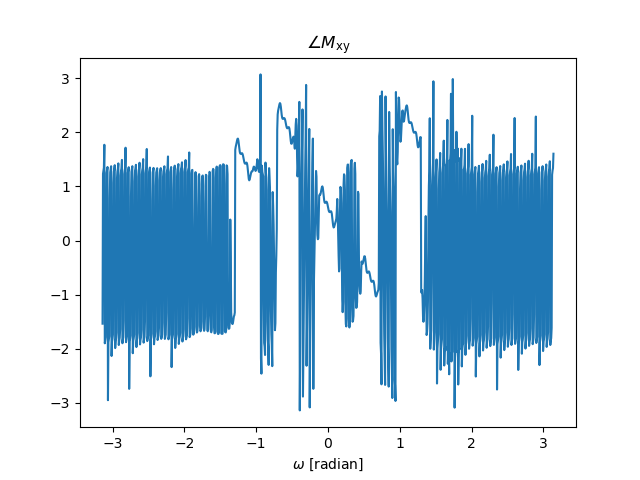

<IPython.core.display.Javascript object>


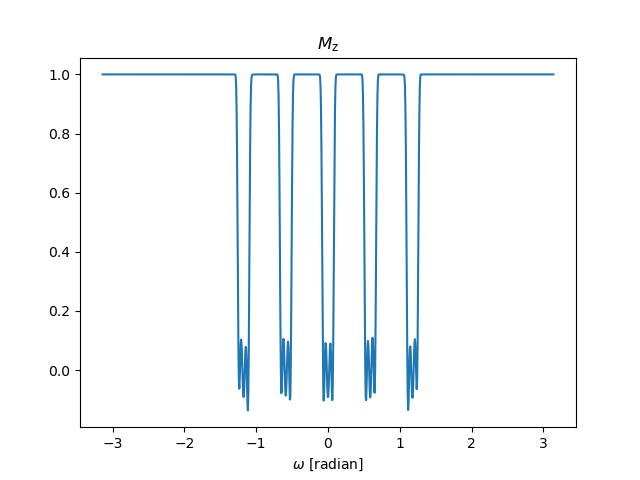

In [4]:
figs = util.plot_rf(b1_slr, refocus_linphase=(n - 1) / 2)

In [6]:
# for i, fig in enumerate(figs):
#     fig.savefig(f'{i}.pdf', transparent=True)

# Design RF pulse using the improved SLR

In [7]:
app = islr.DesignMultibandPaulynomials(n=n, tb=tb, d1=d1, d2=d2, n_bands=n_bands, band_sep=band_sep,
                                      sigma=100)
a, b = app.run()

In [8]:
app.x[-2 * n_bands:]

array([ 0.00194423-6.58449878e-03j, -0.00044681+2.51552819e-04j,
        0.00536159-2.30197763e-17j, -0.00044681-2.51552819e-04j,
        0.00194423+6.58449878e-03j,  0.00194423+6.58449878e-03j,
       -0.00044681-2.51552819e-04j,  0.00536159+2.38671195e-17j,
       -0.00044681+2.51552819e-04j,  0.00194423-6.58449878e-03j])

In [9]:
import linop
D = linop.DiagSum(n)
D(app.P[:n, :n]) + D(app.P[n:, :n:])

array([-2.81922336e-05+9.62033552e-19j, -1.31869469e-05-2.53682972e-18j,
        2.70395073e-05-7.20419796e-19j,  9.38000267e-05+4.10586955e-19j,
        1.41648115e-04+9.50489586e-20j,  1.17122286e-04-1.58083017e-18j,
        3.22206599e-05-1.90235672e-18j, -2.48423434e-05-2.74116534e-19j,
        1.45617314e-05+7.93670336e-19j,  9.91669185e-05-1.19963024e-18j,
        1.03388370e-04+1.06826318e-18j, -1.18182708e-07+1.70965300e-18j,
       -6.29308299e-05-3.04931905e-18j,  7.00571439e-05+6.66972491e-19j,
        3.21481759e-04+8.89385925e-19j,  4.12289738e-04+3.18544798e-18j,
        2.01189017e-04+1.69458432e-18j, -7.53873084e-05+1.91988339e-18j,
       -3.66516148e-05-2.38431883e-19j,  3.51009840e-04+2.52936676e-18j,
        6.57275091e-04+4.17069869e-18j,  4.83842075e-04+3.02773024e-18j,
        6.71046829e-07-2.84016209e-19j, -2.05198610e-04-2.69954408e-18j,
        1.37421839e-04+5.63622045e-19j,  5.90388733e-04-2.31006359e-19j,
        5.32634006e-04+4.84014955e-18j,  8.60203602

In [10]:
m_xy = 2 * D(app.P[n:, :n])

<IPython.core.display.Javascript object>


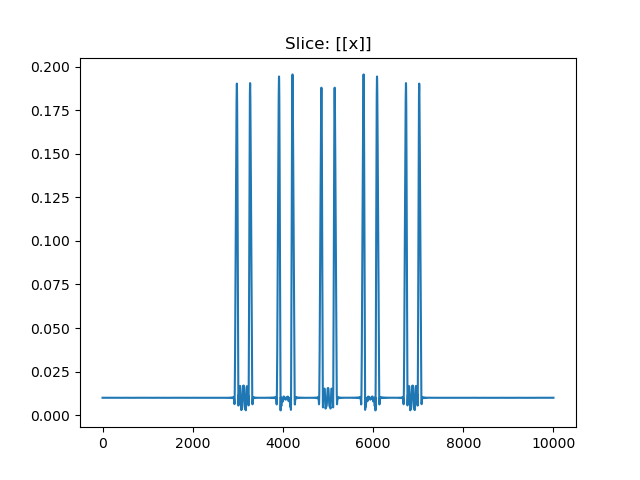

In [11]:
import sigpy as sp
import sigpy.plot

sigpy.plot.LinePlot(sp.fft(m_xy, oshape=[10000], norm=None))

In [12]:
b1_islr = rf.ab2rf(a, b)

In [13]:
# b1_islr = islr.dzmbrf(n=n, tb=tb, ptype='ex', d1=d1, d2=d2, 
#                       n_bands=n_bands, band_sep=band_sep, phs_0_pt=phs_type, sigma=1000, max_iter=2000)

<IPython.core.display.Javascript object>


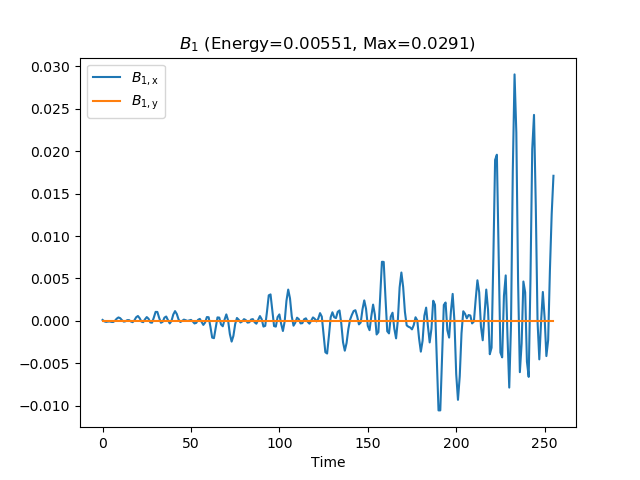

<IPython.core.display.Javascript object>


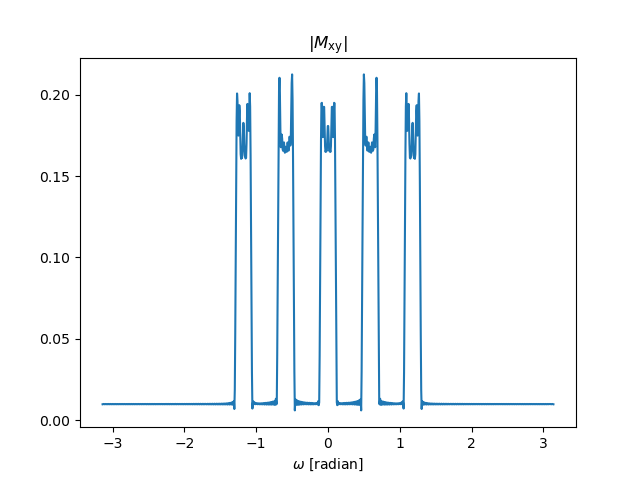

<IPython.core.display.Javascript object>


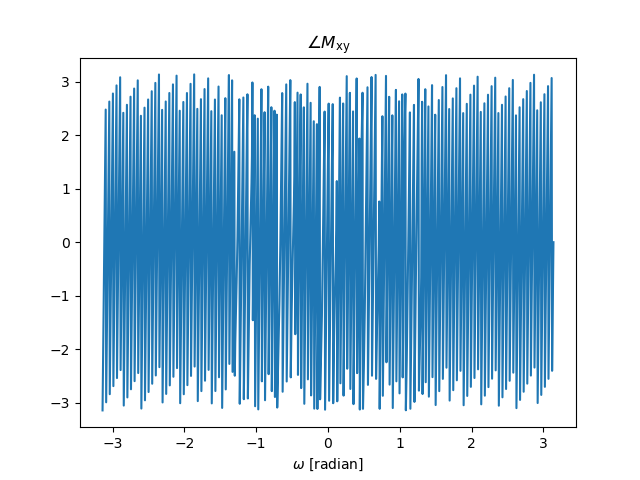

<IPython.core.display.Javascript object>


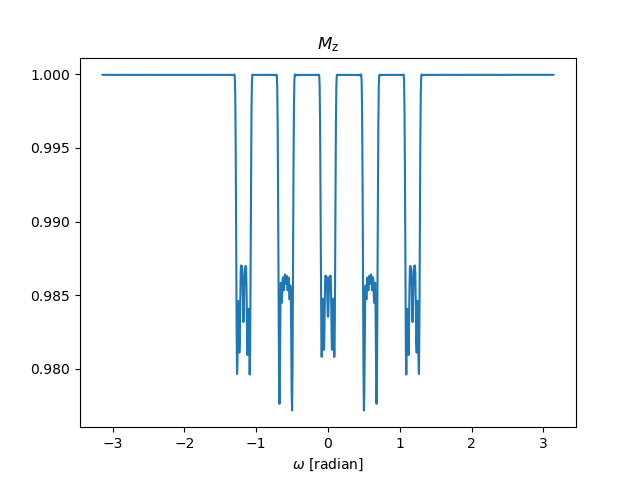

In [14]:
figs = util.plot_rf(b1_islr, refocus_linphase=(n - 1) / 2)

In [ ]:
# for i, fig in enumerate(figs):
#     fig.savefig(f'{i}.pdf', transparent=True)